In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [41]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [43]:
#Dropping certain features 
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [45]:
X = df.drop(['total'], axis =1)
y = df['total']

In [47]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [49]:
# Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [55]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 55.1140 - val_loss: 22.8789
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.5229 - val_loss: 21.9890
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.3508 - val_loss: 21.9943
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.0565 - val_loss: 22.2557
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2065 - val_loss: 21.9202
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1696 - val_loss: 22.4038
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.2059 - val_loss: 22.2035
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1702 - val_loss: 22.0358
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.0820 - val_loss: 22.3358
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2475 - val_loss: 22.1115
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1367 - val_loss: 21.7868
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

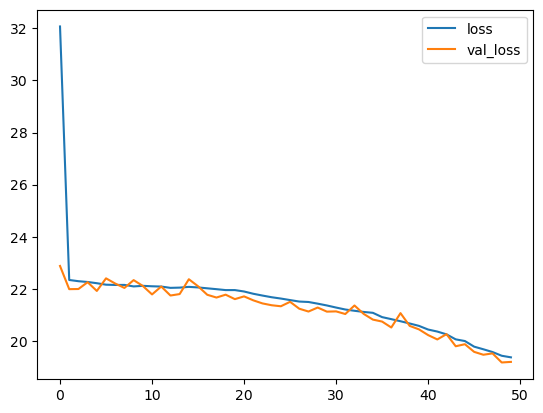

In [57]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [59]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


19.68993377685547

In [61]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [63]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

In [29]:
from tensorflow import keras

# Assuming your trained model is in a variable called `model`
model.save('model.h5')

In [31]:
import joblib

# Assuming your scaler is in a variable called `scaler`
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [37]:
encoders = {
    'venue': venue_encoder,
    'bat_team': batting_team_encoder,
    'bowl_team': bowling_team_encoder,
    'batsman': striker_encoder,
    'bowler': bowler_encoder
}

joblib.dump(encoders, 'encoders.pkl')

['encoders.pkl']

In [67]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Example values
venues = venues = [
    'Wankhede Stadium',
    'Eden Gardens',
    'M. Chinnaswamy Stadium',
    'MA Chidambaram Stadium',
    'Arun Jaitley Stadium',
    'Sawai Mansingh Stadium',
    'Rajiv Gandhi International Cricket Stadium',
    'Narendra Modi Stadium',
    'Punjab Cricket Association Stadium',
    'BRSABV Ekana Cricket Stadium',
    'Himachal Pradesh Cricket Association Stadium',
    'Dr. DY Patil Sports Academy',
    'Holkar Cricket Stadium'
]
teams = [
    'Mumbai Indians',
    'Chennai Super Kings',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Sunrisers Hyderabad',
    'Punjab Kings',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

venue_encoder = LabelEncoder()
venue_encoder.fit(venues)

batting_team_encoder = LabelEncoder()
batting_team_encoder.fit(teams)

bowling_team_encoder = LabelEncoder()
bowling_team_encoder.fit(teams)

# Save them in a dictionary
encoders = {
    'venue': venue_encoder,
    'batting_team': batting_team_encoder,
    'bowling_team': bowling_team_encoder
}

joblib.dump(encoders, 'models/encoders.pkl')

['models/encoders.pkl']

In [79]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Example values
venues = ['M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium', 'Feroz Shah Kotla', 'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
           'Rajiv Gandhi International Stadium', 'MA Chidambaram Stadium', 'Dr DY Patil Sports Academy', 'Newlands', "St George's Park", 'Kingsmead',
           'SuperSport Park', 'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval', 'OUTsurance Oval', 'Brabourne Stadium', 
           'Sardar Patel Stadium', 'Barabati Stadium', 'Vidarbha Cricket Association Stadium', 'Himachal Pradesh Cricket Association Stadium', 
           'Nehru Stadium', 'Holkar Cricket Stadium', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Subrata Roy Sahara Stadium', 
           'Shaheed Veer Narayan Singh International Stadium', 'JSCA International Stadium Complex, Sheikh Zayed Stadium', 'Sharjah Cricket Stadium', 
           'Dubai International Cricket Stadium', 'Maharashtra Cricket Association Stadium', 'Punjab Cricket Association IS Bindra Stadium', 
           'Saurashtra Cricket Association Stadium', 'Green Park'
]

teams = ['Mumbai Indians', 'Chennai Super Kings',' Royal Challengers Bangalore',' Kolkata Knight Riders',' Rajasthan Royals',' Delhi Capitals',
        'Sunrisers Hyderabad', 'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans'
]


players = ['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Mohammad Hafeez', 'PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dhoni', 'SK Raina', 
           'JDP Oram', 'S Badrinath', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif', 'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne', 
           'SK Trivedi', 'L Ronchi', 'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah', 'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'AC Gilchrist'
           'Y Venugopal Rao', 'VVS Laxman', 'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar', 'WPUJC Vaas', 'RP Singh', 'K Goel',
           'JR Hopes', 'KC Sangakkara', 'DPMD Jayawardene', 'Yuvraj Singh',  'IK Pathan', 'S Sohal', 'B Lee', 'PP Chawla', 'WA Mota', 'RR Sarwan', 
           'S Sreesanth', 'VRV Singh', 'S Chanderpaul', 'R Dravid', 'LRPL Taylor', 'JH Kallis', 'V Kohli', 'MV Boucher', 'P Kumar', 'SB Joshi', 'Z Khan',
           'R Vinay Kumar', 'WP Saha', 'LR Shukla', 'AB Agarkar', 'M Kartik', 'I Sharma', 'AM Rahane', 'DJ Bravo', 'MA Khote', 'G Gambhir', 'V Sehwag', 
           'S Dhawan', 'MK Tiwary', 'KD Karthik', 'R Bhatia', 'MF Maharoof', 'VY Mahesh', 'DB Das', 'HH Gibbs', 'DNT Zoysa', 'D Kalyankrishna', 'GC Smith',
           'SA Asnodkar', 'SP Fleming', 'S Vidyut', 'JA Morkel', 'LPC Silva', 'DB Ravi Teja', 'SE Marsh', 'YV Takawale', 'SS Tiwary', 'RR Raje', 
           'Joginder Sharma', 'MS Gony', 'M Muralitharan', 'M Ntini', 'W Jaffer', 'CL White', 'DT Patil', 'A Kumble', 'DW Steyn', 'S Anirudha', 'MM Patel', 
           'AB de Villiers', 'A Chopra', 'BJ Hodge', 'T Taibu', 'PP Ojha', 'SP Goswami', 'B Akhil', 'TM Dilshan', 'A Mishra', 'J Arunkumar', 
           'Iqbal Abdulla', 'CK Kapugedera', 'LA Pomersbach', 'AB Dinda', 'SR Tendulkar', 'B Chipli', 'DR Smith', 'SD Chitnis', 'TM Srivastava', 
           'MK Pandey', 'RR Powar', 'JP Duminy', 'JD Ryder',  'KP Pietersen', 'CH Gayle', 'MC Henriques', 'A Flintoff', 'FH Edwards', 'PC Valthaty', 
           'RJ Quiney', 'AD Mascarenhas', 'AS Raut', 'Pankaj Singh', 'RS Bopara', 'DL Vettori', 'M Manhas', 'PJ Sangwan', 'MN van Wyk', 'AA Bilakhia', 
           'TL Suman', 'GR Napier', 'R Bishnoi', 'RE van der Merwe', 'KP Appanna', 'M Vijay', 'SB Jakati', 'L Balaji', 'NV Ojha', 'LA Carseldine', 
           'RJ Harris', 'D du Preez', 'DS Kulkarni', 'SM Harwood', 'Yashpal Singh', 'AN Ghosh', 'AD Mathews', 'SM Katich', 'DA Warner', 'J Botha', 
           'A Nehra', 'Mashrafe Mortaza', 'GJ Bailey', 'AB McDonald', 'Y Nagar', 'Niraj Patel', 'T Henderson', 'A Singh', 'R Ashwin', 'T Thushara', 
           'Mohammad Ashraful', 'CA Pujara', 'OA Shah', 'AP Tare', 'AT Rayudu', 'R Sathish', 'R McLaren', 'MS Bisla', 'YA Abdulla', 'EJG Morgan', 
           'AA Jhunjhunwala', 'P Dogra', 'A Uniyal', 'KA Pollard', 'MJ Lumb', 'DR Martyn', 'S Narwal', 'M Morkel', 'Anirudh Singh', 'Jaskaran Singh', 
           'FY Fazal', 'AC Voges', 'MD Mishra', 'J Theron', 'R Sharma', 'Mandeep Singh', 'KM Jadhav', 'SW Tait', 'PD Collingwood', 'VS Malik', 
           'SJ Srivastava', 'AP Dole', 'Bipul Sharma', 'DE Bollinger', 'BAW Mendis', 'B Sumanth', 'C Madan', 'AG Paunikar', 'AJ Finch', 'MR Marsh', 
           'STR Binny', 'IR Jaggi', 'DT Christia', 'RV Gomez', 'UBT Chand', 'UT Yadav', 'Sunny Singh', 'NJ Rimmington', 'MA Agarwal', 'AUK Pathan', 
           'AL Menaria', 'DJ Jacobs', 'WD Parnell', 'TD Paine', 'SB Wagh', 'AC Thomas', 'BJ Haddin', 'NLTC Perera', 'MS Wade', 'JE Taylor', 
           'RN ten Doeschate', 'SL Malinga', 'AG Murtaza', 'TR Birt', 'Harpreet Singh', 'NL McCullum', 'DH Yagnik', 'AC Blizzard', 'M Klinger', 
           'I Malhotra', 'A Mithun', 'P Parameswaran', 'AA Chavan', 'ND Doshi', 'CJ Ferguson', 'B Kumar', 'S Rana', 'JEC Franklin', 'Shakib Al Hasan', 
           'F du Plessis', 'SPD Smith', 'MN Samuels', 'KK Cooper', 'HV Patel', 'Ankit Sharma', 'RE Levi', 'RR Bhatkal', 'Harmeet Singh', 'BA Bhatt', 
           'CJ McKay', 'DJ Harris', 'N Saini', 'DA Miller', 'Azhar Mahmood', 'A Ashish Reddy', 'V Pratap Singh', 'BB Samantray', 'RJ Peterson', 'S Nadeem',
           'VR Aaron', 'MJ Clarke', 'AP Majumdar', 'Gurkeerat Singh', 'P Awana', 'SP Narine', 'A Chandila', 'PA Reddy', 'MC Juneja', 'AD Russell', 
           'KK Nair', 'KB Arun Karthik', 'GH Vihari', 'MDKJ Perera', 'R Shukla', 'JD Unadkat', 'M Vohra', 'JP Faulkner', 'R Rampaul', 'BJ Rohrer', 
           'Q de Kock', 'KV Sharma ', 'SMSM Senanayake', 'LJ Wright', 'X Thalaivan Sargunam', 'DJG Sammy', 'MG Johnson', 'A Mukund', 'SV Samson', 
           'BMAJ Mendis', 'KL Rahul', 'CM Gautam', 'KW Richardson', 'Parvez Rasool', 'GJ Maxwell', 'R Dhawan', 'SA Yadav', 'CJ Anderson', 'JJ Bumrah', 
           'CA Lynn', 'MA Starc', 'AR Patel', 'Sandeep Sharma', 'BR Dunk', 'Shivam Sharma', 'LMP Simmons', 'VH Zol', 'BCJ Cutting', 'Mohammed Shami', 
           'BE Hendricks', 'S Gopal', 'M de Lange', 'RR Rossouw', 'JO Holder', 'JDS Neesham', 'Imran Tahir', 'MM Sharma', 'DJ Hooda', 'CH Morris', 
           'SS Iyer', 'SA Abbott', 'AN Ahmed', 'YS Chahal', 'J Suchith', 'P Negi', 'RG More', 'Anureet Singh', 'HH Pandya', 'NM Coulter-Nile', 'PV Tambe', 
           'MJ McClenaghan', 'DJ Muthuswami', 'SN Thakur', 'SN Khan', 'D Wiese', 'S Aravind', 'JC Buttler', 'CR Brathwaite', 'MP Stoinis', 'C Munro', 
           'P Sahu', 'KH Pandya', 'TG Southee', 'MJ Guptill', 'KJ Abbott', 'TM Head', 'AD Nath', 'NS Naik', 'Ishan Kishan', 'SW Billings', 'RR Pant', 
           'KS Williamson', 'KC Cariappa', 'PSP Handscomb', 'Sachin Baby', 'J Yadav', 'UT Khawaja', 'HM Amla', 'BB Sran', 'N Rana', 'F Behardien', 
           'R Dwivedi', 'J Roy', 'BA Stokes', 'Vishnu Vinod', 'TS Mills', 'Basil Thampi', 'CR Woakes', 'V Shankar', 'Rashid Khan', 'RA Tripathi', 
           'RD Chahar', 'LH Ferguson', 'C de Grandhomme', 'PJ Cummins', 'Mohammad Nabi', 'Kuldeep Yadav', 'Washington Sundar', 'S Badree', 'A Choudhary',
           'AR Bawne', 'AJ Tye', 'Ankit Soni', 'K Rabada', 'AF Milne', 'SP Jackson', 'Swapnil Singh', 'R Tewatia', 'AS Rajpoot'
]


venue_encoder = LabelEncoder()
venue_encoder.fit(venues)

batting_team_encoder = LabelEncoder()
batting_team_encoder.fit(teams)

bowling_team_encoder = LabelEncoder()
bowling_team_encoder.fit(teams)

striker_encoder = LabelEncoder()
striker_encoder.fit(players)

bowler_encoder = LabelEncoder()
bowler_encoder.fit(players)

encoders = {
    'venue': venue_encoder,
    'batting_team': batting_team_encoder,
    'bowling_team': bowling_team_encoder,
    'striker': striker_encoder,
    'bowler': bowler_encoder
}

joblib.dump(encoders, 'models/encoders.pkl')

['models/encoders.pkl']